## 🚀 Python Lab: Convolutional Neural Networks (CNNs)
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 5 - April 26, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week09/01_CNN_Keras_Cifar_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week09/01_CNN_Keras_Cifar_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np

**GPU**
- You are encouraged to install the tensorflow-gpu package
- Refer to https://www.tensorflow.org/install/ for instructions
- You need an Nvidia GPU for tensorflow-gpu to work

## CIFAR Dataset
- A data set of 32x32 color images
- Categorized into one of ten classifications

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 3287s 19us/step
(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


> **TODO:** Modify this notebook to regognize handwritten digits.
> - Start with this command:
>   `from keras.datasets import mnist`
<!-- from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() -->

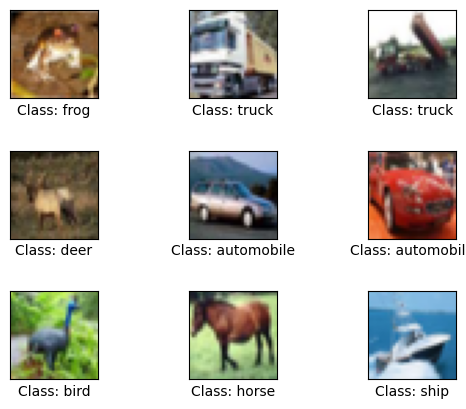

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    xlabel = "Class: {0}".format(class_names[y_train[i].argmax()])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])

- Pixel data: 8-bit values (0-255)
- NN inputs: floating point values (0-1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## CNN Model
### Topology
- 2 Conv2D layer
- 0 Dropout layer
- 0 Batch normalization

In [5]:
def createModel(input_shape):

    model = Sequential()
    ## FIRST SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=input_shape, activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ## SECOND SET OF LAYERS

    # CONVOLUTIONAL LAYER
    model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
    # POOLING LAYER
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
    model.add(Flatten())

    # 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
    model.add(Dense(256, activation='relu'))

    # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model.add(Dense(10, activation='softmax'))

    return model

In [6]:
model = createModel(x_train.shape[1:])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

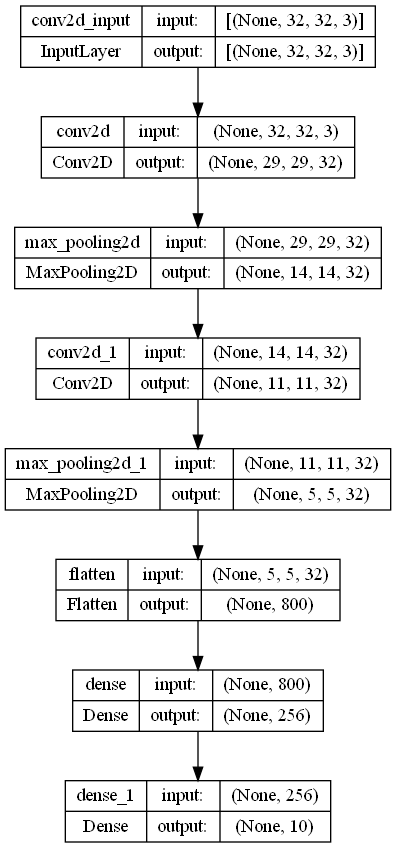

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Train: 10 Epochs

In [10]:
import time
start_time = time.time()

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True)

elapsed_time = time.time() - start_time
print(elapsed_time)

Epoch 1/10
1563/1563 [==============================] - 39s 9ms/step - loss: 1.8021 - accuracy: 0.3534 - val_loss: 1.5991 - val_accuracy: 0.4252
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5096 - accuracy: 0.4571 - val_loss: 1.4442 - val_accuracy: 0.4851
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4071 - accuracy: 0.4975 - val_loss: 1.4252 - val_accuracy: 0.4945
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3349 - accuracy: 0.5268 - val_loss: 1.3111 - val_accuracy: 0.5371
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2806 - accuracy: 0.5502 - val_loss: 1.2818 - val_accuracy: 0.5498
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2328 - accuracy: 0.5677 - val_loss: 1.2798 - val_accuracy: 0.5507
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1936 - accuracy: 0.5827 - val_loss: 1.1901 - val_

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.1297 - accuracy: 0.6015
Test loss: 1.1297378540039062
Test accuracy: 0.6014999747276306


> **TODO:** Complete the following table:

| Model #     | Num of Trainable Params  |  Batch_size | Test accuracy (10 Epochs) | Elapsed Time (s) |
| ---         | ---                      | ---         | ---                       | ---              |
| 1           | 225,610                  |  64         | 60.15%                    | 171              |
| 2           | 225,610                  |  256        | 00.00%                    | 0000             |
| 3           | ???????                  |  1          | 00.00%                    | 0000             |


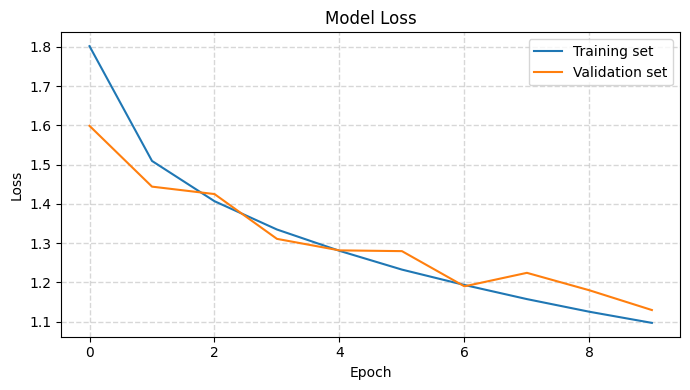

In [12]:
def render_training_history_loss(training_history):
    loss = training_history.history['loss']
    #TODO: Add validation history
    plt.figure(figsize=(7, 4))
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.tight_layout()
    plt.show()
    
render_training_history_loss(history)

> **TODO:** Add validation history to the plots

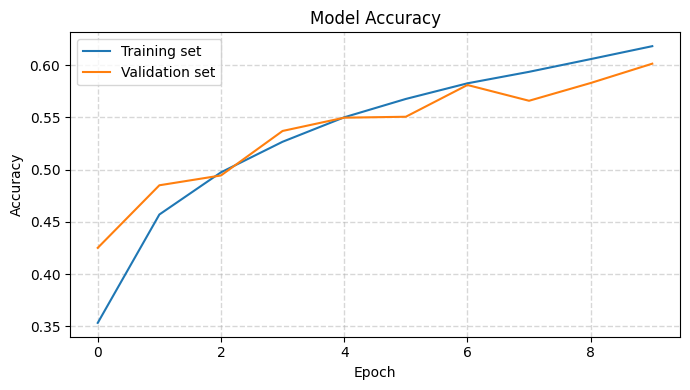

In [13]:
def render_training_history_acc(training_history):
    acc = training_history.history['accuracy']
    #TODO: Add validation history
    plt.figure(figsize=(7, 4))
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(acc, label='Training set')
    plt.plot(val_acc, label='Validation set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.tight_layout()
    plt.show()
    
render_training_history_acc(history)

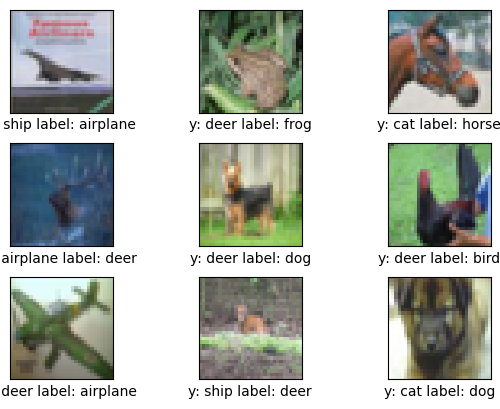

In [25]:
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.6)

cont = 0
for i, ax in enumerate(axes.flat):
    while 1:
        cont += 1
        test_image = x_test[cont,:]
        predicted_cat = model.predict(np.array([test_image]), verbose=0).argmax()
        label = y_test[cont].argmax()
        if (predicted_cat != label):
            break
    ax.imshow(test_image)
    xlabel = 'y: %s label: %s' % (class_names[predicted_cat], class_names[label])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])

## Save weights

In [26]:
# model.save('cifar_10epochs.h5')

## `Your Turn`
> **TODO:** Try different network structures. See the following examples:

In [ ]:
# ## 2-Layer NN
# model = Sequential()

# ## FIRST SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# ## SECOND SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
# model.add(Flatten())

# # 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# model.add(Dense(512, activation='relu'))

# # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# model.add(Dense(10, activation='softmax'))


# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [ ]:
# ## 4-Layer NN
# epochs = 10 accuracy=71.29%

# model = Sequential()
#     model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
#     model.add(Activation('relu'))
#     model.add(Conv2D(32,(3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(64, (3,3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes))
#     model.add(Activation('softmax'))

#     sgd = SGD(lr = 0.1, decay=1e-6, nesterov=True)

In [ ]:
# ## 6-layer NN
# Trainable params: 2,396,330

# i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
# x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)

# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation='softmax')(x)

# model = Model(i, x)

## Results

In [43]:
from sklearn.metrics import classification_report

# predictions = model.predict_classes(x_test)
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1000
           1       0.86      0.48      0.62      1000
           2       0.73      0.23      0.35      1000
           3       0.60      0.18      0.28      1000
           4       0.73      0.30      0.42      1000
           5       0.66      0.34      0.45      1000
           6       0.80      0.60      0.68      1000
           7       0.86      0.49      0.62      1000
           8       0.64      0.78      0.70      1000
           9       0.75      0.57      0.65      1000

   micro avg       0.74      0.45      0.56     10000
   macro avg       0.74      0.45      0.54     10000
weighted avg       0.74      0.45      0.54     10000
 samples avg       0.45      0.45      0.45     10000



C:\Users\Victus\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

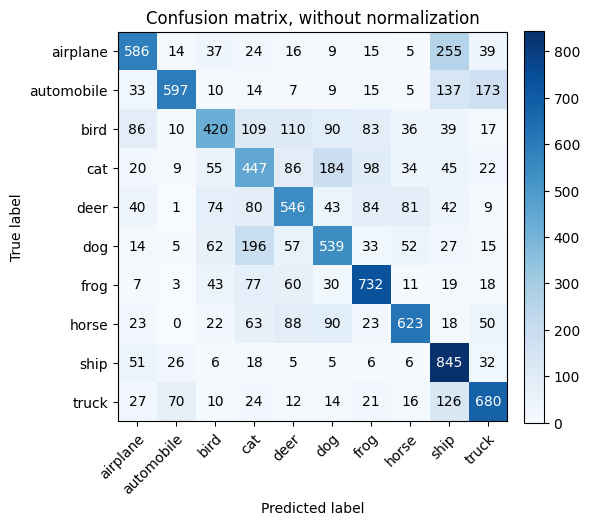

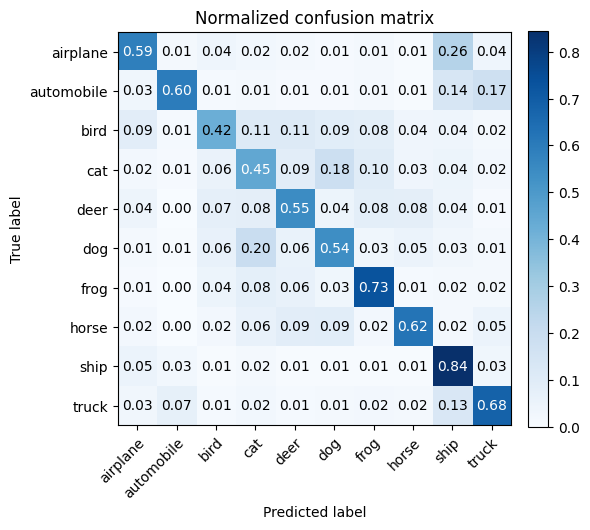

In [41]:
## TODO: Plot confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    raise NotImplementedError